# Intelligent placer

Пример работы текущей версии программы и наглядные результаты

Сначала загрузим все необходимые библиотеки, если их не было

In [ ]:
!pip install -r requirements.txt

Изображения располагаются в трех директориях, иногда удобно пользоваться уже их определенными именами

In [1]:
no_dir = "signals_dataset/no"
yes_dir = "signals_dataset/yes"
obj_dir = "signals_dataset/objects"

Запуск основной функции производится следующим образом.

In [1]:
from intelligent_placer_lib.intelligent_placer import check_image
path = 'signals_dataset\\no\\2.jpg'
check_image(path)

False

Но такой подход малоинформативен для демонстрации работы алгоритма. Поэтому рассмотрим работу программы по шагам.

## Определение объектов

Первым шагом бинаризируем изображение с помощью детектора Кэнни и морфологических операций.

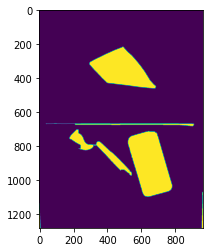

In [2]:
from intelligent_placer_lib.objects_detection import read_image, preprocess_image
import matplotlib.pyplot as plt

image = read_image(path)
bin_image = preprocess_image(image)
plt.imshow(bin_image)

Далее выделим контуры многоугольника и объектов. Выделенные контуры проходят через специфические проверки, сделанные конкретно под датасет.

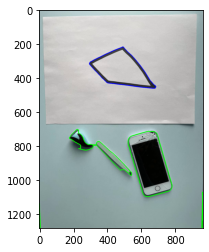

In [3]:
from intelligent_placer_lib.intelligent_placer import find_contours
import cv2
polygon, objects = find_contours(bin_image)
cv2.drawContours(image, polygon, -1, (0, 0, 255), thickness=4)
cv2.drawContours(image, objects, -1, (0, 255, 0), thickness=4)
plt.imshow(image)

Выделим объекты прямоугольниками, чтобы потом манипулировать именно с ними, как с наиболее простыми фигурами. У многоугольника определим его углы.

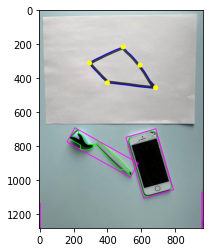

In [4]:
from intelligent_placer_lib.objects_detection import find_min_rect, find_approx_polygon

rectangles = find_min_rect(objects)
polygon_angles = find_approx_polygon(polygon)
cv2.drawContours(image, rectangles, -1, (255, 0, 255), 4)
cv2.drawContours(image, polygon_angles, -1, (255, 255, 0), thickness=30)
plt.imshow(image)

## Проверка на вместимоость

В самой простой версии просто сравниваем площади полученного многоугольника и сумму площадей всех объектов для получения ответа на поставленную задачу. Конечно, такая проверка крайне неисчерпывающая. В дальнейшем придется сравнивать геометрические размеры всех предметов и размеры имеющегося многоугольника.

In [5]:
from intelligent_placer_lib.objects_arrangemant import is_objects_placed

is_objects_placed(polygon, objects)

False

В данном случае программа отработала правильно.

## Промежуточные результаты
На всем датасете была запущена программа. Результаты ее выполнения лежат в директории results. Алгоритм совершил 3 ошибки на разделе датасета 'no' и 7 ошибок на разделе датасета 'yes'. Всего в датасете 38 изображений. Точность получается 0.7368

Так же алгоритм совершает ошибки при распознавании предметов: границы нескольких предметов могут сливаться. Это связно с тенями и близким расположением предметов друг к другу. Например, на изображении 'signals_dataset/yes/1.jpg'